In [1]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import xgboost as xgb
import os
from datetime import datetime
import math
from imblearn.over_sampling import SMOTE

In [30]:
df1=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/PPD_RiskControl_Competition/PPD-First-Round-Data-Update/Training Set/PPD_LogInfo_3_1_Training_Set.csv')

In [36]:
df2=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/PPD_RiskControl_Competition/PPD-First-Round-Data-Update/Training Set/df2.csv',encoding='GBK')


In [31]:
df3=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/PPD_RiskControl_Competition/PPD-First-Round-Data-Update/Training Set/PPD_Userupdate_Info_3_1_Training_Set.csv')

In [32]:
df1.head()

,Idx,Listinginfo1,LogInfo1,LogInfo2,LogInfo3
0,10001,2014-03-05,107,6,2014-02-20
1,10001,2014-03-05,107,6,2014-02-23
2,10001,2014-03-05,107,6,2014-02-24
3,10001,2014-03-05,107,6,2014-02-25
4,10001,2014-03-05,107,6,2014-02-27


In [37]:
df2.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,...,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target,ListingInfo
0,10001,1.0,深圳,4.0,深圳,NaN,1.0,NaN,1.0,1.0,...,222,-1,0,0,0,0,0,1,0,2014/3/5
1,10002,1.0,温州,4.0,温州,NaN,0.0,NaN,1.0,1.0,...,1,-1,0,0,0,0,0,2,0,2014/2/26
2,10003,1.0,宜昌,3.0,宜昌,NaN,0.0,NaN,2.0,2.0,...,-1,-1,-1,1,0,0,0,0,0,2014/2/28
3,10006,4.0,南平,1.0,南平,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,0,0,0,0,0,0,2014/2/25
4,10007,5.0,辽阳,1.0,辽阳,NaN,0.0,NaN,1.0,1.0,...,-1,-1,-1,0,0,0,0,0,0,2014/2/27


In [7]:
df2.describe()

,Idx,UserInfo_1,UserInfo_3,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,...,SocialNetwork_9,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target
count,30000.000000,29994.000000,29993.000000,970.000000,28342.000000,970.000000,28349.000000,28349.000000,28349.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,46318.673267,3.219911,4.694329,2.201031,0.131466,1.308247,3.025962,1.816960,2.948711,10.632800,...,35.516167,75.211233,-0.999267,-0.745033,0.221167,0.062033,0.027967,0.016633,0.253467,0.073267
std,26640.397805,1.827684,1.321458,7.831679,0.358486,7.866457,3.772421,1.701177,3.770300,16.097588,...,135.954587,742.978305,0.052911,0.441473,0.420545,0.242598,0.164880,0.127895,0.437296,0.260578
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22924.250000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46849.500000,3.000000,5.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,6.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69447.250000,5.000000,5.000000,1.000000,0.000000,1.000000,3.000000,2.000000,3.000000,13.000000,...,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,91703.000000,7.000000,7.000000,133.000000,4.000000,133.000000,165.000000,73.000000,165.000000,722.000000,...,3242.000000,71253.000000,6.000000,1.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000


In [8]:
train_1 = df2[df2.target==1]
temp = train_1[['ListingInfo','target']].groupby('ListingInfo').agg('sum')*2


In [9]:
temp = temp.rename(columns={'target':'count_1'})
temp['date'] = temp.index
temp.date = temp.date.apply(lambda x:(date(int(x.split('/')[0]),int(x.split('/')[1]),int(x.split('/')[2]))-date(2013,11,1)).days)


In [10]:
temp = temp.sort_values(by='date')

In [11]:
train_0=df2[df2['target']==0]

In [12]:
temp_0=train_0[['ListingInfo','target']].groupby('ListingInfo').agg('count')

In [13]:
temp_0=temp_0.rename(columns={'target':'count_0'})
temp_0['date']=temp_0.index
temp_0.date=temp_0.date.apply(lambda x:(date(int(x.split('/')[0]),int(x.split('/')[1]),int(x.split('/')[2]))-date(2013,11,1)).days)

In [14]:
temp_0 = temp_0.sort_values(by='date')

Text(0, 0.5, 'count')

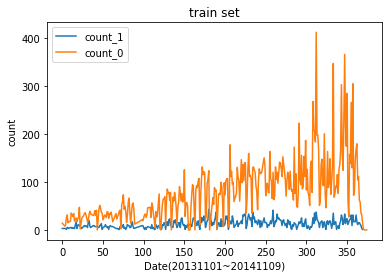

In [15]:
ax = temp.plot(x='date',y='count_1',title="train set")
temp_0.plot(x='date',y='count_0',ax=ax)

plt.xlabel('Date(20131101~20141109)')
plt.ylabel('count')

In [16]:
dfnull_col=df2.isnull().sum(axis=0)
dfnull_row=df2.isnull().sum(axis=1)

In [17]:
dfnull_col=dfnull_col.sort_values(ascending=False)

In [18]:
dfnull_col=pd.DataFrame(dfnull_col)

In [19]:
dfnull_col.columns=['missnum']

In [21]:
dfnull_coltop=dfnull_col[0:20]

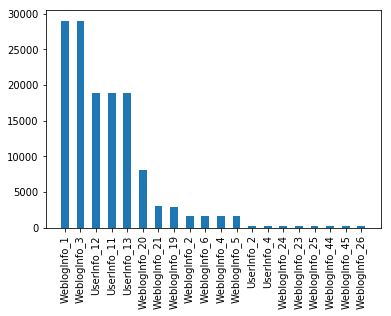

In [22]:
p=plt.gca()
plt.bar(dfnull_coltop.index, dfnull_coltop['missnum'], width=0.5)
for label in p.xaxis.get_ticklabels():
    label.set_rotation(90)

In [23]:
df2=df2.drop('WeblogInfo_3',axis=1)


In [24]:
df2=df2.drop('WeblogInfo_1',axis=1)

In [25]:
#df2_test=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/PPD_RiskControl_Competition/PPD-First-Round-Data-Update/Test Set/PPD_Master_GBK_2_Test_Set.csv',encoding='GBK')


In [26]:
#
dfnull_row=pd.DataFrame(dfnull_row)

In [27]:
dfnull_row.columns=['missnum_row']

In [28]:
dfnull_row.sort_values('missnum_row')
#plt.scatter(dfnull_row.index,dfnull_row['missnum_row'],c='k')

,missnum_row
24493,0
12332,0
27754,0
24332,0
6246,0
26443,0
23474,0
20564,0
20156,0
22755,0


In [29]:
df_des=df2.describe()

In [30]:
df_des=df_des.transpose()

In [31]:
drop=[]
for i in df_des[df_des['std']<=0.1].index:
    drop.append(i)

In [32]:
df2=df2.drop(drop,axis=1)

In [33]:
train_y=df2['target']
train_x=df2.drop(['Idx','target'],axis=1)

In [34]:
dtrain = xgb.DMatrix(train_x, label=train_y)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields UserInfo_2, UserInfo_4, UserInfo_7, UserInfo_8, UserInfo_9, UserInfo_19, UserInfo_20, UserInfo_22, UserInfo_23, UserInfo_24, Education_Info2, Education_Info3, Education_Info4, Education_Info6, Education_Info7, Education_Info8, WeblogInfo_19, WeblogInfo_20, WeblogInfo_21, ListingInfo

In [35]:
#use numerical category to get feature importance
df2_feature_import=df2.drop(['UserInfo_2','UserInfo_4','UserInfo_7','UserInfo_8','UserInfo_9','UserInfo_19','UserInfo_20','UserInfo_22','UserInfo_23','UserInfo_24','Education_Info2','Education_Info3','Education_Info4','Education_Info6','Education_Info7','Education_Info8','WeblogInfo_19','WeblogInfo_20','WeblogInfo_21','ListingInfo'],axis=1)

In [36]:
importance_train_x=df2_feature_import.drop(['Idx','target'],axis=1)


In [37]:
dtrain = xgb.DMatrix(importance_train_x, label=train_y)

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [38]:
df2_test=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/PPD_RiskControl_Competition/PPD-First-Round-Data-Update/Test Set/Kesci_Master_9w_gbk_2.csv',encoding='gb18030')

In [39]:
df2_test=df2_test.drop(['WeblogInfo_3','WeblogInfo_3'],axis=1)

In [40]:
df2_test=df2_test.drop(drop,axis=1)

In [41]:
test_y=df2_test['target']
test_x=df2_test.drop(['Idx','target'],axis=1)

In [42]:
df2_test_feature_import=df2_test.drop(['UserInfo_2','UserInfo_4','UserInfo_7','UserInfo_8','UserInfo_9','UserInfo_19','UserInfo_20','UserInfo_22','UserInfo_23','UserInfo_24','Education_Info2','Education_Info3','Education_Info4','Education_Info6','Education_Info7','Education_Info8','WeblogInfo_19','WeblogInfo_20','WeblogInfo_21','ListingInfo'],axis=1)

In [43]:
importance_test_x=df2_test_feature_import.drop(['Idx','target'],axis=1)

In [44]:
dtest = xgb.DMatrix(importance_test_x, label=test_y)  

In [45]:
def pipeline(random_seed,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight):
    params={
            'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
	    'eval_metric': 'auc',
	    'gamma':gamma,
	    'max_depth':max_depth,
	    'lambda':lambd,
	    'subsample':subsample,
	    'colsample_bytree':colsample_bytree,
	    'min_child_weight':min_child_weight, 
	    'eta': 0.2,
	    'seed':random_seed,
	    'nthread':8
	 }

    watchlist  = [(dtrain,'train')]
    model = xgb.train(params,dtrain,num_boost_round=700,evals=watchlist)
    #model.save_model('./model/xgb{0}.model'.format(iteration))
    #predict test set
    #test_y = model.predict(dtest)
    #test_result = pd.DataFrame(test_Idx,columns=["Idx"])
    #test_result["score"] = test_y
    #test_result.to_csv("./preds/xgb{0}.csv".format(iteration),index=None,encoding='utf-8')
    
    #save feature score
    feature_score = model.get_fscore()
    feature_score = sorted(feature_score.items(), key=lambda x:x[1],reverse=True)
    fs = pd.DataFrame(feature_score,columns=['feature','fscore'])
    fs['fscore'] = fs['fscore'] / fs['fscore'].sum()
    #for (key,value) in feature_score:
    #    fs.append("{0},{1}\n".format(key,value))
    return fs

In [46]:
if __name__ == "__main__":
    
    random_seed = 1024
    gamma = 0.1
    max_depth = 6
    lambd = 500
    subsample = 0.6
    colsample_bytree = 0.3
    min_child_weight = 0.2
    '''
    params={
    	'booster':'gbtree',
    	'objective': 'rank:pairwise',
    	'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
        'eval_metric': 'auc',
    	'gamma':0.1,
    	'max_depth':6,
    	'lambda':500,
        'subsample':0.6,
        'colsample_bytree':0.3,
        'min_child_weight':0.2, 
        'eta': 0.04,
    	'seed':1024,
    	'nthread':8
        }
    '''
    #random.shuffle(random_seed)
    #random.shuffle(gamma)
    #random.shuffle(max_depth)
    #random.shuffle(lambd)
    #random.shuffle(subsample)
    #random.shuffle(colsample_bytree)
    #random.shuffle(min_child_weight)
    
    
    importance_rank=pipeline(random_seed,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight)


[0]	train-auc:0.673832
[1]	train-auc:0.70924
[2]	train-auc:0.721572
[3]	train-auc:0.738644
[4]	train-auc:0.748726
[5]	train-auc:0.753012
[6]	train-auc:0.754381
[7]	train-auc:0.756117
[8]	train-auc:0.758796
[9]	train-auc:0.764246
[10]	train-auc:0.769142
[11]	train-auc:0.771805
[12]	train-auc:0.774349
[13]	train-auc:0.777187
[14]	train-auc:0.780262
[15]	train-auc:0.78282
[16]	train-auc:0.78418
[17]	train-auc:0.7872
[18]	train-auc:0.78942
[19]	train-auc:0.791812
[20]	train-auc:0.793235
[21]	train-auc:0.79561
[22]	train-auc:0.797692
[23]	train-auc:0.799297
[24]	train-auc:0.800688
[25]	train-auc:0.802873
[26]	train-auc:0.804763
[27]	train-auc:0.80604
[28]	train-auc:0.807622
[29]	train-auc:0.80882
[30]	train-auc:0.809575
[31]	train-auc:0.8112
[32]	train-auc:0.813142
[33]	train-auc:0.814735
[34]	train-auc:0.816435
[35]	train-auc:0.8184
[36]	train-auc:0.820086
[37]	train-auc:0.821266
[38]	train-auc:0.822897
[39]	train-auc:0.824629
[40]	train-auc:0.826333
[41]	train-auc:0.826967
[42]	train-auc:

[334]	train-auc:0.977056
[335]	train-auc:0.977255
[336]	train-auc:0.977271
[337]	train-auc:0.97735
[338]	train-auc:0.977488
[339]	train-auc:0.977567
[340]	train-auc:0.977814
[341]	train-auc:0.977826
[342]	train-auc:0.977997
[343]	train-auc:0.978119
[344]	train-auc:0.978268
[345]	train-auc:0.978457
[346]	train-auc:0.978549
[347]	train-auc:0.978645
[348]	train-auc:0.978991
[349]	train-auc:0.979108
[350]	train-auc:0.979092
[351]	train-auc:0.979381
[352]	train-auc:0.979379
[353]	train-auc:0.9795
[354]	train-auc:0.979644
[355]	train-auc:0.97968
[356]	train-auc:0.979815
[357]	train-auc:0.979997
[358]	train-auc:0.980269
[359]	train-auc:0.980301
[360]	train-auc:0.980443
[361]	train-auc:0.980627
[362]	train-auc:0.980615
[363]	train-auc:0.980871
[364]	train-auc:0.980988
[365]	train-auc:0.981095
[366]	train-auc:0.981095
[367]	train-auc:0.981247
[368]	train-auc:0.981339
[369]	train-auc:0.981421
[370]	train-auc:0.981622
[371]	train-auc:0.981749
[372]	train-auc:0.981873
[373]	train-auc:0.981972
[374

[664]	train-auc:0.996669
[665]	train-auc:0.996675
[666]	train-auc:0.996711
[667]	train-auc:0.996728
[668]	train-auc:0.996737
[669]	train-auc:0.996719
[670]	train-auc:0.996719
[671]	train-auc:0.996726
[672]	train-auc:0.996716
[673]	train-auc:0.996722
[674]	train-auc:0.996728
[675]	train-auc:0.99675
[676]	train-auc:0.996778
[677]	train-auc:0.996825
[678]	train-auc:0.99682
[679]	train-auc:0.996845
[680]	train-auc:0.996852
[681]	train-auc:0.996838
[682]	train-auc:0.996844
[683]	train-auc:0.996866
[684]	train-auc:0.996861
[685]	train-auc:0.996884
[686]	train-auc:0.996906
[687]	train-auc:0.996914
[688]	train-auc:0.996936
[689]	train-auc:0.996976
[690]	train-auc:0.996997
[691]	train-auc:0.997019
[692]	train-auc:0.996998
[693]	train-auc:0.997025
[694]	train-auc:0.997063
[695]	train-auc:0.99708
[696]	train-auc:0.997093
[697]	train-auc:0.997135
[698]	train-auc:0.997144
[699]	train-auc:0.997148


In [47]:
#缺失点个数
df2[importance_rank[0:20]['feature']].isnull().sum(axis=1)


0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    0
29974    0
29975    0
29976    0
29977    0
29978    0
29979    0
29980    0
29981    0
29982    0
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    0
29992    0
29993    0
29994    0
29995    0
29996    0
29997    0
29998    0
29999    0
Length: 30000, dtype: int64

In [96]:
#transform userinfo to lower
userinfo1=[]
for i in df3_combine['UserupdateInfo1']:
    userinfo1.append(i.lower())
    

In [97]:
df3_combine['UserupdateInfo1']=userinfo1

In [98]:
#delete space
userinfo9=[]
for i in df2_combine['UserInfo_9']:
    userinfo9.append(i.strip())
df2_combine['UserInfo_9']=userinfo9


In [99]:
#delete shi in userinfo8
userinfo8=[]
for i in df2_combine['UserInfo_8']:
    userinfo8.append(i.strip('市'))

In [100]:
df2_combine['UserInfo_8']=userinfo8

In [101]:
province=df2_combine.groupby('UserInfo_7')['target'].sum()/df2_combine.groupby('UserInfo_7')['target'].count()
province=pd.DataFrame(province)


In [102]:
province.columns=['default_rate']

In [103]:
province.sort_values(by='default_rate',ascending=False)

,default_rate
UserInfo_7,
山东,0.109798
四川,0.106701
天津,0.102236
湖南,0.099338
吉林,0.097276
辽宁,0.093686
湖北,0.089683
海南,0.084211
重庆,0.082786


In [93]:
df3_test=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/PPD_RiskControl_Competition/PPD-First-Round-Data-Update/Test Set/PPD_Userupdate_Info_2_Test_Set.csv',encoding='GBK')

In [94]:
df3_combine=pd.concat([df3,df3_test],axis=0)

In [95]:
df2_combine=pd.concat([df2,df2_test],axis=0)

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [104]:
issichuan=[]
for i in df2_combine['UserInfo_7']:
    if i=='四川':
        issichuan.append(1)
    else:
        issichuan.append(0)

In [105]:
df2_combine['issichuan']=issichuan

In [106]:
isshandong=[]
for i in df2_combine['UserInfo_7']:
    if i=='山东':
        isshandong.append(1)
    else:
        isshandong.append(0)
df2_combine['isshandong']=isshandong

In [107]:
istianjin=[]
for i in df2_combine['UserInfo_7']:
    if i=='天津':
        istianjin.append(1)
    else:
        istianjin.append(0)
df2_combine['istianjin']=istianjin

In [108]:
ishunan=[]
for i in df2_combine['UserInfo_7']:
    if i=='湖南':
        ishunan.append(1)
    else:
        ishunan.append(0)
df2_combine['ishunan']=ishunan

In [109]:
isjilin=[]
for i in df2_combine['UserInfo_7']:
    if i=='吉林':
        isjilin.append(1)
    else:
        isjilin.append(0)
df2_combine['isjilin']=isjilin

In [110]:
isliaoning=[]
for i in df2_combine['UserInfo_7']:
    if i=='辽宁':
        isliaoning.append(1)
    else:
        isliaoning.append(0)
df2_combine['isliaoning']=isliaoning

In [111]:
df2_combine.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_combine.csv')

In [112]:
set(df2_combine['UserInfo_2'])

{nan,
 '七台河',
 '三明',
 '三门峡',
 '上海',
 '上饶',
 '东莞',
 '东营',
 '中山',
 '临夏回族自治州',
 '临汾',
 '临沂',
 '临沧',
 '丹东',
 '丽水',
 '丽江',
 '乌兰察布盟',
 '乌海',
 '乌鲁木齐',
 '乐山',
 '九江',
 '云浮',
 '亳州',
 '伊春',
 '伊犁哈萨克自治州',
 '佛山',
 '佳木斯',
 '保定',
 '保山',
 '信阳',
 '克孜勒苏柯尔克孜自治州',
 '克拉玛依',
 '六安',
 '六盘水',
 '兰州',
 '兴安盟',
 '内江',
 '凉山',
 '包头',
 '北京',
 '北海',
 '十堰',
 '南京',
 '南充',
 '南宁',
 '南平',
 '南昌',
 '南通',
 '南阳',
 '博尔塔拉蒙古自治州',
 '厦门',
 '双鸭山',
 '台州',
 '合肥',
 '吉安',
 '吉林市',
 '吐鲁番',
 '吕梁',
 '吴忠',
 '周口',
 '呼伦贝尔',
 '呼和浩特',
 '和田',
 '咸宁',
 '咸阳',
 '哈密',
 '哈尔滨',
 '唐山',
 '商丘',
 '商洛',
 '喀什',
 '嘉兴',
 '嘉峪关',
 '四平',
 '固原',
 '大兴安岭',
 '大同',
 '大庆',
 '大理白族自治州',
 '大连',
 '天水',
 '天津',
 '太原',
 '威海',
 '娄底',
 '孝感',
 '宁德',
 '宁波',
 '安庆',
 '安康',
 '安阳',
 '安顺',
 '定西',
 '宜宾',
 '宜昌',
 '宜春',
 '宝鸡',
 '宣城',
 '宿州',
 '宿迁',
 '山南',
 '岳阳',
 '崇左',
 '巢湖',
 '巴中',
 '巴彦淖尔盟',
 '巴音郭楞蒙古自治州',
 '常州',
 '常德',
 '平凉',
 '平顶山',
 '广元',
 '广安',
 '广州',
 '庆阳',
 '廊坊',
 '延安',
 '延边朝鲜族自治州',
 '开封',
 '张家口',
 '张家界',
 '张掖',
 '徐州',
 '德宏傣族景颇族自治州',
 '德州',
 '德阳',
 '忻州',
 '怀化',
 '恩施',
 '惠州',
 '成都',
 '

In [2]:
from sklearn import preprocessing

In [70]:
one_hot=preprocessing.OneHotEncoder(sparse=False)


In [80]:
city=[]
for i in set(df2_combine['UserInfo_2'].fillna(' ')):
    city.append(i)

In [81]:
onehot=one_hot.fit(np.array(city).reshape(-1,1))

In [246]:
#onehot.transform(np.array(df2_combine['UserInfo_2']).reshape(-1,1))

In [248]:
#len(onehot.transform(np.array(df2_combine['UserInfo_2']).reshape(-1,1)))

In [83]:
df2_combine['UserInfo_2']=df2_combine['UserInfo_2'].fillna(' ')

In [84]:
df2_combine_onehot=df2_combine

In [85]:
onehot.transform(np.array(df2_combine['UserInfo_2']).reshape(-1,1))

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [75]:
df2_combine_onehot['UserInfo_2']=onehot.transform(np.array(df2_combine['UserInfo_2']).reshape(-1,1))

In [76]:
city_train_x=onehot.transform(np.array(df2_combine['UserInfo_2']).reshape(-1,1))

ValueError: Found unknown categories [0.0, 1.0] in column 0 during transform

In [162]:
#df2_combine.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_combine_onehot.csv')

In [305]:
onehot.transform(np.array(df2_combine['UserInfo_2']).reshape(-1,1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [307]:
city_train_x=pd.DataFrame(city_train_x)

int

In [309]:

city_train_y=df2_combine['target']

In [310]:
dtrain_city=xgb.DMatrix(city_train_x, label=city_train_y)

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [311]:
def pipeline2(random_seed,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight):
    params={
            'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'scale_pos_weight': float(len(city_train_y)-sum(city_train_y))/float(sum(city_train_y)),
	    'eval_metric': 'auc',
	    'gamma':gamma,
	    'max_depth':max_depth,
	    'lambda':lambd,
	    'subsample':subsample,
	    'colsample_bytree':colsample_bytree,
	    'min_child_weight':min_child_weight, 
	    'eta': 0.2,
	    'seed':random_seed,
	    'nthread':8
	 }

    watchlist  = [(dtrain_city,'train')]
    model = xgb.train(params,dtrain_city,num_boost_round=700,evals=watchlist)
    #model.save_model('./model/xgb{0}.model'.format(iteration))
    #predict test set
    #test_y = model.predict(dtest)
    #test_result = pd.DataFrame(test_Idx,columns=["Idx"])
    #test_result["score"] = test_y
    #test_result.to_csv("./preds/xgb{0}.csv".format(iteration),index=None,encoding='utf-8')
    
    #save feature score
    feature_score = model.get_fscore()
    feature_score = sorted(feature_score.items(), key=lambda x:x[1],reverse=True)
    fs = pd.DataFrame(feature_score,columns=['feature','fscore'])
    fs['fscore'] = fs['fscore'] / fs['fscore'].sum()
    #for (key,value) in feature_score:
    #    fs.append("{0},{1}\n".format(key,value))
    return fs

In [312]:
if __name__ == "__main__":
    
    random_seed = 1024
    gamma = 0.1
    max_depth = 6
    lambd = 500
    subsample = 0.6
    colsample_bytree = 0.3
    min_child_weight = 0.2
    '''
    params={
    	'booster':'gbtree',
    	'objective': 'rank:pairwise',
    	'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
        'eval_metric': 'auc',
    	'gamma':0.1,
    	'max_depth':6,
    	'lambda':500,
        'subsample':0.6,
        'colsample_bytree':0.3,
        'min_child_weight':0.2, 
        'eta': 0.04,
    	'seed':1024,
    	'nthread':8
        }
    '''
    #random.shuffle(random_seed)
    #random.shuffle(gamma)
    #random.shuffle(max_depth)
    #random.shuffle(lambd)
    #random.shuffle(subsample)
    #random.shuffle(colsample_bytree)
    #random.shuffle(min_child_weight)
    
    
    importance_rank=pipeline2(random_seed,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight)


[0]	train-auc:0.517391
[1]	train-auc:0.527431
[2]	train-auc:0.531309
[3]	train-auc:0.53855
[4]	train-auc:0.54308
[5]	train-auc:0.548658
[6]	train-auc:0.548648
[7]	train-auc:0.551716
[8]	train-auc:0.552171
[9]	train-auc:0.553991
[10]	train-auc:0.556183
[11]	train-auc:0.557601
[12]	train-auc:0.559465
[13]	train-auc:0.559963
[14]	train-auc:0.562097
[15]	train-auc:0.562524
[16]	train-auc:0.563635
[17]	train-auc:0.564831
[18]	train-auc:0.567644
[19]	train-auc:0.567597
[20]	train-auc:0.569261
[21]	train-auc:0.569454
[22]	train-auc:0.569428
[23]	train-auc:0.569369
[24]	train-auc:0.56914
[25]	train-auc:0.570515
[26]	train-auc:0.571351
[27]	train-auc:0.571341
[28]	train-auc:0.57172
[29]	train-auc:0.571761
[30]	train-auc:0.571752
[31]	train-auc:0.571953
[32]	train-auc:0.572023
[33]	train-auc:0.572194
[34]	train-auc:0.572329
[35]	train-auc:0.572456
[36]	train-auc:0.573062
[37]	train-auc:0.573654
[38]	train-auc:0.574699
[39]	train-auc:0.574688
[40]	train-auc:0.575063
[41]	train-auc:0.575061
[42]	t

[334]	train-auc:0.598213
[335]	train-auc:0.59824
[336]	train-auc:0.598151
[337]	train-auc:0.598126
[338]	train-auc:0.598251
[339]	train-auc:0.598331
[340]	train-auc:0.598347
[341]	train-auc:0.598471
[342]	train-auc:0.598507
[343]	train-auc:0.598493
[344]	train-auc:0.598507
[345]	train-auc:0.598478
[346]	train-auc:0.598379
[347]	train-auc:0.598415
[348]	train-auc:0.598434
[349]	train-auc:0.598557
[350]	train-auc:0.598591
[351]	train-auc:0.598652
[352]	train-auc:0.598659
[353]	train-auc:0.598652
[354]	train-auc:0.598709
[355]	train-auc:0.59869
[356]	train-auc:0.59868
[357]	train-auc:0.598719
[358]	train-auc:0.598805
[359]	train-auc:0.598799
[360]	train-auc:0.59882
[361]	train-auc:0.598832
[362]	train-auc:0.598885
[363]	train-auc:0.598904
[364]	train-auc:0.59882
[365]	train-auc:0.598901
[366]	train-auc:0.598944
[367]	train-auc:0.599
[368]	train-auc:0.598997
[369]	train-auc:0.599022
[370]	train-auc:0.599044
[371]	train-auc:0.598986
[372]	train-auc:0.599037
[373]	train-auc:0.599068
[374]	tr

[664]	train-auc:0.603091
[665]	train-auc:0.60311
[666]	train-auc:0.603083
[667]	train-auc:0.603098
[668]	train-auc:0.603092
[669]	train-auc:0.603124
[670]	train-auc:0.603125
[671]	train-auc:0.602989
[672]	train-auc:0.602995
[673]	train-auc:0.602986
[674]	train-auc:0.603006
[675]	train-auc:0.603028
[676]	train-auc:0.603025
[677]	train-auc:0.603011
[678]	train-auc:0.603042
[679]	train-auc:0.603053
[680]	train-auc:0.603037
[681]	train-auc:0.603057
[682]	train-auc:0.603063
[683]	train-auc:0.603166
[684]	train-auc:0.603176
[685]	train-auc:0.603164
[686]	train-auc:0.603184
[687]	train-auc:0.603219
[688]	train-auc:0.603219
[689]	train-auc:0.603146
[690]	train-auc:0.603137
[691]	train-auc:0.603146
[692]	train-auc:0.603139
[693]	train-auc:0.603248
[694]	train-auc:0.603299
[695]	train-auc:0.603319
[696]	train-auc:0.603331
[697]	train-auc:0.603302
[698]	train-auc:0.603304
[699]	train-auc:0.603326


In [86]:
top_10=importance_rank.sort_values('fscore',ascending=False)[0:10]

In [87]:
top_10

,feature,fscore
0,ThirdParty_Info_Period2_3,0.013110
1,ThirdParty_Info_Period1_13,0.012882
2,ThirdParty_Info_Period2_17,0.012825
3,ThirdParty_Info_Period1_5,0.012740
4,ThirdParty_Info_Period1_3,0.012540
5,ThirdParty_Info_Period1_17,0.012284
6,ThirdParty_Info_Period2_15,0.012227
7,ThirdParty_Info_Period2_16,0.012198
8,ThirdParty_Info_Period1_14,0.012141
9,ThirdParty_Info_Period2_5,0.011799


In [347]:
city_rank=[]
city_feature=[]

In [348]:
for i in range(10):
    item=np.zeros(330)
    item[int(importance_rank['feature'][i])]=1
    city_rank.append(item)
for i in range(10):
    city_feature.append(int(importance_rank['feature'][i]))

In [92]:
df2_combine.groupby('UserInfo_2')['target'].sum()

UserInfo_2
0.0    3695
1.0      23
Name: target, dtype: int64

In [89]:
df2_combine.columns

Index(['Education_Info1', 'Education_Info2', 'Education_Info3',
       'Education_Info4', 'Education_Info5', 'Education_Info6',
       'Education_Info7', 'Education_Info8', 'Idx', 'ListingInfo',
       ...
       'WeblogInfo_7', 'WeblogInfo_8', 'WeblogInfo_9', 'target', 'issichuan',
       'isshandong', 'istianjin', 'ishunan', 'isjilin', 'isliaoning'],
      dtype='object', length=217)

In [120]:
isweifang=[]
for i in df2_combine['UserInfo_2']:
    if i=='潍坊市':
        isweifang.append(1)
    else:
        isweifang.append(0)
df2_combine['isweifang']=isweifang

In [121]:
isjiujiang=[]
for i in df2_combine['UserInfo_2']:
    if i=='九江市':
        isjiujiang.append(1)
    else:
        isjiujiang.append(0)
df2_combine['isjiujiang']=isjiujiang

In [122]:
isshantou=[]
for i in df2_combine['UserInfo_2']:
    if i=='汕头市':
        isshantou.append(1)
    else:
        isshantou.append(0)
df2_combine['isshantou']=isshantou

In [123]:
ischangchun=[]
for i in df2_combine['UserInfo_2']:
    if i=='长春市':
        ischangchun.append(1)
    else:
        ischangchun.append(0)
df2_combine['ischangchun']=ischangchun

In [124]:
istieling=[]
for i in df2_combine['UserInfo_2']:
    if i=='铁岭市':
        istieling.append(1)
    else:
        istieling.append(0)
df2_combine['istieling']=istieling

In [125]:
isjinan=[]
for i in df2_combine['UserInfo_2']:
    if i=='济南市':
        isjinan.append(1)
    else:
        isjinan.append(0)
df2_combine['isjinan']=isjinan

In [126]:
ischengdu=[]
for i in df2_combine['UserInfo_2']:
    if i=='成都市':
        ischengdu.append(1)
    else:
        ischengdu.append(0)
df2_combine['ischengdu']=ischengdu

In [127]:
iszibo=[]
for i in df2_combine['UserInfo_2']:
    if i=='淄博市':
        iszibo.append(1)
    else:
        iszibo.append(0)
df2_combine['iszibo']=iszibo

In [129]:
level1=['北京','上海','广州','深圳']
level2=['厦门','福州','无锡','合肥','昆明','哈尔滨','济南','佛山','长春','温州','石家庄','南宁','常州','南昌','贵阳','太原','烟台','嘉兴','南通','金华','珠海','惠州','徐州','海口','乌鲁木齐','绍兴','中山','台州','兰州']
city_level=[]


In [130]:
for i in df2_combine['UserInfo_2']:
    if i in level1:
        city_level.append(1)
    elif i in level2:
        city_level.append(2)
    else:
        city_level.append(3)


In [132]:
df2_combine['city_level']=city_level

In [133]:
df2_combine.columns

Index(['Education_Info1', 'Education_Info2', 'Education_Info3',
       'Education_Info4', 'Education_Info5', 'Education_Info6',
       'Education_Info7', 'Education_Info8', 'Idx', 'ListingInfo',
       ...
       'isliaoning', 'isweifang', 'isjiujiang', 'isshantou', 'ischangchun',
       'istieling', 'isjinan', 'ischengdu', 'iszibo', 'city_level'],
      dtype='object', length=226)

In [134]:
df2_combine.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_combine.csv')

In [3]:
df2_combine=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_combine.csv')

In [20]:
diff24=pd.DataFrame(df2_combine['UserInfo_2']==df2_combine['UserInfo_4'])


In [21]:
diff_24=[]
for i in diff24[0]:
    if i==True:
        diff_24.append(1)
    else: 
        diff_24.append(0)


In [12]:
diff28=pd.DataFrame(df2_combine['UserInfo_2']==df2_combine['UserInfo_8'])
diff220=pd.DataFrame(df2_combine['UserInfo_2']==df2_combine['UserInfo_20'])
diff48=pd.DataFrame(df2_combine['UserInfo_4']==df2_combine['UserInfo_8'])
diff420=pd.DataFrame(df2_combine['UserInfo_4']==df2_combine['UserInfo_20'])
diff820=pd.DataFrame(df2_combine['UserInfo_8']==df2_combine['UserInfo_20'])

In [13]:
diff_28=[]
for i in diff28[0]:
    if i==True:
        diff_28.append(1)
    else: 
        diff_28.append(0)



In [14]:
diff_220=[]
for i in diff220[0]:
    if i==True:
        diff_220.append(1)
    else: 
        diff_220.append(0)



In [15]:
diff_48=[]
for i in diff48[0]:
    if i==True:
        diff_48.append(1)
    else: 
        diff_48.append(0)

In [16]:
diff_420=[]
for i in diff420[0]:
    if i==True:
        diff_420.append(1)
    else: 
        diff_420.append(0)



In [17]:
diff_820=[]
for i in diff820[0]:
    if i==True:
        diff_820.append(1)
    else: 
        diff_820.append(0)

In [22]:
df2_combine['diff_24']=diff_24
df2_combine['diff_28']=diff_28
df2_combine['diff_220']=diff_220
df2_combine['diff_48']=diff_48
df2_combine['diff_420']=diff_420
df2_combine['diff_820']=diff_820

In [24]:
df2_combine.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_combine.csv')

In [28]:
df2_combine.head(5)

,Unnamed: 0,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,Idx,...,isjinan,ischengdu,iszibo,city_level,diff_24,diff_28,diff_220,diff_48,diff_420,diff_820
0,0,0,E,E,E,0,E,E,E,10001,...,0,0,0,1,1,1,0,1,0,0
1,1,0,E,E,E,0,E,E,E,10002,...,0,0,0,2,1,1,0,1,0,0
2,2,0,E,E,E,0,E,E,E,10003,...,0,0,0,3,1,1,0,1,0,0
3,3,0,E,E,E,0,E,E,E,10006,...,0,0,0,3,1,1,0,1,0,0
4,4,0,E,E,E,0,E,E,E,10007,...,0,0,0,3,1,1,0,1,0,0


In [44]:
type(df2_combine['ListingInfo'][0])

str

In [56]:
listinginfo=[]
for i in df2_combine['ListingInfo']:
    listinginfo.append(i.replace('/','-'))

In [58]:
df2_combine['ListingInfo']=listinginfo

In [59]:
df2_combine.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_combine.csv')

In [15]:
listing=[]
for i in df2_combine['ListingInfo']:
    listing.append(datetime.date(datetime.strptime(i, '%Y-%m-%d')))


In [16]:
date_c=[]
for i in listing:
    date_c.append((i-min(listing)).days)

In [17]:
df2_combine['date_c']=date_c

In [11]:
df2_combine=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_combine.csv')

In [12]:
listBins=[]
for i in range(39):
    listBins.append(i*10)
listLabels=[]
for i in range(38):
    listLabels.append(i)

In [13]:
listBins

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380]

In [18]:
date_d=pd.cut(date_c, bins=listBins, labels=listLabels, include_lowest=True)

In [19]:
df2_combine['date_d']=date_d

In [20]:
df2_combine.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_combine.csv')

In [21]:
str_col=[]
for i in df2_combine.columns:
    if type(df2_combine[i][0])==str:
        str_col.append(i)
        

In [22]:
df2_dropstr=df2_combine.drop(str_col,axis=1)

In [23]:
df2_str=df2_combine[str_col]

In [24]:
df2_str=df2_str.drop(['ListingInfo','UserInfo_19','UserInfo_2','UserInfo_4','UserInfo_7','UserInfo_8','UserInfo_20','UserInfo_24'],axis=1)

In [25]:
df2_str_dummy=pd.get_dummies(df2_str)

In [26]:
df2_dropstr.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_dropstr.csv')
df2_str_dummy.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_str_dummy.csv')

In [27]:
key=df2_dropstr.ix[:,0:1]

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [28]:
df2_dropstr['key']=key
df2_str_dummy['key']=key

In [29]:
df2_combine=pd.merge(df2_dropstr,df2_str_dummy,on='key')

In [30]:
df2_combine_dummy=df2_combine

In [31]:
df2_combine_dummy.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_combine_dummy.csv')

In [32]:
for i in df2_combine_dummy.columns:
    print(i)

Unnamed: 0
Unnamed: 0.1
Unnamed: 0.1.1
Education_Info1
Education_Info5
Idx
SocialNetwork_10
SocialNetwork_12
SocialNetwork_13
SocialNetwork_14
SocialNetwork_15
SocialNetwork_16
SocialNetwork_17
SocialNetwork_2
SocialNetwork_3
SocialNetwork_4
SocialNetwork_5
SocialNetwork_6
SocialNetwork_7
SocialNetwork_8
SocialNetwork_9
ThirdParty_Info_Period1_1
ThirdParty_Info_Period1_10
ThirdParty_Info_Period1_11
ThirdParty_Info_Period1_12
ThirdParty_Info_Period1_13
ThirdParty_Info_Period1_14
ThirdParty_Info_Period1_15
ThirdParty_Info_Period1_16
ThirdParty_Info_Period1_17
ThirdParty_Info_Period1_2
ThirdParty_Info_Period1_3
ThirdParty_Info_Period1_4
ThirdParty_Info_Period1_5
ThirdParty_Info_Period1_6
ThirdParty_Info_Period1_7
ThirdParty_Info_Period1_8
ThirdParty_Info_Period1_9
ThirdParty_Info_Period2_1
ThirdParty_Info_Period2_10
ThirdParty_Info_Period2_11
ThirdParty_Info_Period2_12
ThirdParty_Info_Period2_13
ThirdParty_Info_Period2_14
ThirdParty_Info_Period2_15
ThirdParty_Info_Period2_16
ThirdParty_In

In [33]:
columns_useful=df2_combine_dummy.columns[3:]

In [34]:
df2_combine_dummy=df2_combine_dummy[columns_useful]

In [35]:
train_y=df2_combine_dummy['target']
train_x=df2_combine_dummy.drop(['target','date_c','Idx','key'],axis=1)

In [44]:
train_x=train_x.drop('date_d',axis=1)

In [45]:
dtrain = xgb.DMatrix(train_x, label=train_y)

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [46]:
def pipeline(random_seed,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight):
    params={
            'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
	    'eval_metric': 'auc',
	    'gamma':gamma,
	    'max_depth':max_depth,
	    'lambda':lambd,
	    'subsample':subsample,
	    'colsample_bytree':colsample_bytree,
	    'min_child_weight':min_child_weight, 
	    'eta': 0.2,
	    'seed':random_seed,
	    'nthread':8
	 }

    watchlist  = [(dtrain,'train')]
    model = xgb.train(params,dtrain,num_boost_round=700,evals=watchlist)
    #model.save_model('./model/xgb{0}.model'.format(iteration))
    #predict test set
    #test_y = model.predict(dtest)
    #test_result = pd.DataFrame(test_Idx,columns=["Idx"])
    #test_result["score"] = test_y
    #test_result.to_csv("./preds/xgb{0}.csv".format(iteration),index=None,encoding='utf-8')
    
    #save feature score
    feature_score = model.get_fscore()
    feature_score = sorted(feature_score.items(), key=lambda x:x[1],reverse=True)
    fs = pd.DataFrame(feature_score,columns=['feature','fscore'])
    fs['fscore'] = fs['fscore'] / fs['fscore'].sum()
    #for (key,value) in feature_score:
    #    fs.append("{0},{1}\n".format(key,value))
    return fs

In [47]:
if __name__ == "__main__":
    
    random_seed = 1024
    gamma = 0.1
    max_depth = 6
    lambd = 500
    subsample = 0.6
    colsample_bytree = 0.3
    min_child_weight = 0.2
    '''
    params={
    	'booster':'gbtree',
    	'objective': 'rank:pairwise',
    	'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
        'eval_metric': 'auc',
    	'gamma':0.1,
    	'max_depth':6,
    	'lambda':500,
        'subsample':0.6,
        'colsample_bytree':0.3,
        'min_child_weight':0.2, 
        'eta': 0.04,
    	'seed':1024,
    	'nthread':8
        }
    '''
    #random.shuffle(random_seed)
    #random.shuffle(gamma)
    #random.shuffle(max_depth)
    #random.shuffle(lambd)
    #random.shuffle(subsample)
    #random.shuffle(colsample_bytree)
    #random.shuffle(min_child_weight)
    
    
    importance_rank=pipeline(random_seed,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight)



[0]	train-auc:0.673847
[1]	train-auc:0.700249
[2]	train-auc:0.712013
[3]	train-auc:0.727735
[4]	train-auc:0.734938
[5]	train-auc:0.740963
[6]	train-auc:0.744749
[7]	train-auc:0.748864
[8]	train-auc:0.756497
[9]	train-auc:0.760215
[10]	train-auc:0.76272
[11]	train-auc:0.765142
[12]	train-auc:0.76855
[13]	train-auc:0.770885
[14]	train-auc:0.772967
[15]	train-auc:0.774099
[16]	train-auc:0.775553
[17]	train-auc:0.776686
[18]	train-auc:0.778986
[19]	train-auc:0.780859
[20]	train-auc:0.782065
[21]	train-auc:0.783803
[22]	train-auc:0.784458
[23]	train-auc:0.786167
[24]	train-auc:0.787257
[25]	train-auc:0.788226
[26]	train-auc:0.78942
[27]	train-auc:0.790669
[28]	train-auc:0.791871
[29]	train-auc:0.792525
[30]	train-auc:0.794207
[31]	train-auc:0.795244
[32]	train-auc:0.796445
[33]	train-auc:0.797791
[34]	train-auc:0.79916
[35]	train-auc:0.800331
[36]	train-auc:0.801229
[37]	train-auc:0.802015
[38]	train-auc:0.80293
[39]	train-auc:0.803953
[40]	train-auc:0.805219
[41]	train-auc:0.806818
[42]	tr

[334]	train-auc:0.952947
[335]	train-auc:0.953256
[336]	train-auc:0.953567
[337]	train-auc:0.953897
[338]	train-auc:0.954237
[339]	train-auc:0.954473
[340]	train-auc:0.954721
[341]	train-auc:0.954838
[342]	train-auc:0.955098
[343]	train-auc:0.95534
[344]	train-auc:0.955464
[345]	train-auc:0.955613
[346]	train-auc:0.955749
[347]	train-auc:0.956074
[348]	train-auc:0.956266
[349]	train-auc:0.956407
[350]	train-auc:0.95668
[351]	train-auc:0.957012
[352]	train-auc:0.95735
[353]	train-auc:0.957578
[354]	train-auc:0.957696
[355]	train-auc:0.957796
[356]	train-auc:0.957869
[357]	train-auc:0.958116
[358]	train-auc:0.958286
[359]	train-auc:0.958438
[360]	train-auc:0.958811
[361]	train-auc:0.959047
[362]	train-auc:0.959192
[363]	train-auc:0.959305
[364]	train-auc:0.959329
[365]	train-auc:0.959601
[366]	train-auc:0.959903
[367]	train-auc:0.960143
[368]	train-auc:0.960283
[369]	train-auc:0.960472
[370]	train-auc:0.960743
[371]	train-auc:0.960876
[372]	train-auc:0.96115
[373]	train-auc:0.961343
[374

[664]	train-auc:0.989487
[665]	train-auc:0.989542
[666]	train-auc:0.98957
[667]	train-auc:0.98963
[668]	train-auc:0.989619
[669]	train-auc:0.989712
[670]	train-auc:0.989707
[671]	train-auc:0.989749
[672]	train-auc:0.989785
[673]	train-auc:0.989765
[674]	train-auc:0.989881
[675]	train-auc:0.989973
[676]	train-auc:0.990033
[677]	train-auc:0.990115
[678]	train-auc:0.99019
[679]	train-auc:0.990166
[680]	train-auc:0.990267
[681]	train-auc:0.990281
[682]	train-auc:0.990298
[683]	train-auc:0.990361
[684]	train-auc:0.990439
[685]	train-auc:0.990477
[686]	train-auc:0.990458
[687]	train-auc:0.990476
[688]	train-auc:0.990491
[689]	train-auc:0.990512
[690]	train-auc:0.990544
[691]	train-auc:0.990597
[692]	train-auc:0.990606
[693]	train-auc:0.990624
[694]	train-auc:0.990694
[695]	train-auc:0.990785
[696]	train-auc:0.990811
[697]	train-auc:0.990885
[698]	train-auc:0.990883
[699]	train-auc:0.990942


In [48]:
top_40=importance_rank.sort_values('fscore',ascending=False)[0:40]

In [49]:
top_40

,feature,fscore
0,ThirdParty_Info_Period3_13,0.013762
1,ThirdParty_Info_Period1_13,0.013258
2,ThirdParty_Info_Period2_13,0.013046
3,ThirdParty_Info_Period1_14,0.012913
4,ThirdParty_Info_Period1_4,0.012701
5,ThirdParty_Info_Period2_17,0.012383
6,ThirdParty_Info_Period5_15,0.012277
7,ThirdParty_Info_Period2_15,0.012197
8,ThirdParty_Info_Period1_16,0.011879
9,ThirdParty_Info_Period3_17,0.011481


In [50]:
thirdParty=[]
for i in df2_combine_dummy.columns:
    if 'ThirdParty' in i:
        thirdParty.append(i)

In [51]:
ThirdParty=df2_combine_dummy[thirdParty]

In [52]:
ThirdParty['key']=key

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
ThirdParty.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/ThirdParty.csv')

In [2]:
ThirdParty=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/ThirdParty.csv')

In [53]:
for i in range(len(thirdParty)):
    for j in range(i+1,len(thirdParty)):
        ThirdParty[thirdParty[i]+thirdParty[j]]=ThirdParty[thirdParty[i]]/ThirdParty[thirdParty[j]]

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df2_combine_dummy=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_combine_dummy.csv')

In [54]:
ThirdParty=ThirdParty.ix[:,1:7143]

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [55]:
ThirdParty['target']=df2_combine_dummy['target']

In [56]:
from sklearn.model_selection import cross_val_score


In [57]:
train_x=ThirdParty.drop('target',axis=1)
train_y=ThirdParty['target']

In [58]:
dtrain = xgb.DMatrix(train_x, label=train_y)

In [61]:
def pipeline(random_seed,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight):
    params={
            'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
	    'eval_metric': 'auc',
	    'gamma':gamma,
	    'max_depth':max_depth,
	    'lambda':lambd,
	    'subsample':subsample,
	    'colsample_bytree':colsample_bytree,
	    'min_child_weight':min_child_weight, 
	    'eta': 0.2,
	    'seed':random_seed,
	    'nthread':8
	 }

    watchlist  = [(dtrain,'train')]
    model = xgb.train(params,dtrain,num_boost_round=700,evals=watchlist)
    #model.save_model('./model/xgb{0}.model'.format(iteration))
    #predict test set
    #test_y = model.predict(dtest)
    #test_result = pd.DataFrame(test_Idx,columns=["Idx"])
    #test_result["score"] = test_y
    #test_result.to_csv("./preds/xgb{0}.csv".format(iteration),index=None,encoding='utf-8')
    
    #save feature score
    #scores=cross_val_score(model,train_x,train_y,cv=5)
    feature_score = model.get_fscore()
    feature_score = sorted(feature_score.items(), key=lambda x:x[1],reverse=True)
    fs = pd.DataFrame(feature_score,columns=['feature','fscore'])
    fs['fscore'] = fs['fscore'] / fs['fscore'].sum()
    #for (key,value) in feature_score:
    #    fs.append("{0},{1}\n".format(key,value))
    return fs

In [62]:
if __name__ == "__main__":
    
    random_seed = 1024
    gamma = 0.1
    max_depth = 6
    lambd = 500
    subsample = 0.6
    colsample_bytree = 0.3
    min_child_weight = 0.2
    '''
    params={
    	'booster':'gbtree',
    	'objective': 'rank:pairwise',
    	'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
        'eval_metric': 'auc',
    	'gamma':0.1,
    	'max_depth':6,
    	'lambda':500,
        'subsample':0.6,
        'colsample_bytree':0.3,
        'min_child_weight':0.2, 
        'eta': 0.04,
    	'seed':1024,
    	'nthread':8
        }
    '''
    #random.shuffle(random_seed)
    #random.shuffle(gamma)
    #random.shuffle(max_depth)
    #random.shuffle(lambd)
    #random.shuffle(subsample)
    #random.shuffle(colsample_bytree)
    #random.shuffle(min_child_weight)
    
    
    importance_rank=pipeline(random_seed,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight)



[0]	train-auc:0.71128
[1]	train-auc:0.738114
[2]	train-auc:0.751047
[3]	train-auc:0.757712
[4]	train-auc:0.765496
[5]	train-auc:0.769493
[6]	train-auc:0.773791
[7]	train-auc:0.777183
[8]	train-auc:0.779599
[9]	train-auc:0.783149
[10]	train-auc:0.787239
[11]	train-auc:0.790122
[12]	train-auc:0.792683
[13]	train-auc:0.79545
[14]	train-auc:0.798005
[15]	train-auc:0.800449
[16]	train-auc:0.80254
[17]	train-auc:0.804292
[18]	train-auc:0.805917
[19]	train-auc:0.8077
[20]	train-auc:0.810012
[21]	train-auc:0.812129
[22]	train-auc:0.814705
[23]	train-auc:0.816861
[24]	train-auc:0.81876
[25]	train-auc:0.820333
[26]	train-auc:0.822287
[27]	train-auc:0.823933
[28]	train-auc:0.82547
[29]	train-auc:0.827534
[30]	train-auc:0.829958
[31]	train-auc:0.831385
[32]	train-auc:0.832834
[33]	train-auc:0.834838
[34]	train-auc:0.835962
[35]	train-auc:0.837692
[36]	train-auc:0.839689
[37]	train-auc:0.841095
[38]	train-auc:0.842901
[39]	train-auc:0.844335
[40]	train-auc:0.846144
[41]	train-auc:0.847135
[42]	trai

[334]	train-auc:0.994347
[335]	train-auc:0.994369
[336]	train-auc:0.99444
[337]	train-auc:0.994494
[338]	train-auc:0.994575
[339]	train-auc:0.994607
[340]	train-auc:0.994712
[341]	train-auc:0.994747
[342]	train-auc:0.994876
[343]	train-auc:0.994908
[344]	train-auc:0.994914
[345]	train-auc:0.994928
[346]	train-auc:0.994978
[347]	train-auc:0.995016
[348]	train-auc:0.995106
[349]	train-auc:0.995125
[350]	train-auc:0.995169
[351]	train-auc:0.995249
[352]	train-auc:0.995323
[353]	train-auc:0.995362
[354]	train-auc:0.995433
[355]	train-auc:0.995491
[356]	train-auc:0.995525
[357]	train-auc:0.995532
[358]	train-auc:0.995567
[359]	train-auc:0.995611
[360]	train-auc:0.995651
[361]	train-auc:0.995746
[362]	train-auc:0.995771
[363]	train-auc:0.995799
[364]	train-auc:0.99583
[365]	train-auc:0.995897
[366]	train-auc:0.995946
[367]	train-auc:0.995956
[368]	train-auc:0.996005
[369]	train-auc:0.996056
[370]	train-auc:0.996105
[371]	train-auc:0.996162
[372]	train-auc:0.996187
[373]	train-auc:0.996249
[3

[664]	train-auc:0.999685
[665]	train-auc:0.999696
[666]	train-auc:0.999703
[667]	train-auc:0.999695
[668]	train-auc:0.999699
[669]	train-auc:0.999695
[670]	train-auc:0.9997
[671]	train-auc:0.999701
[672]	train-auc:0.999699
[673]	train-auc:0.999695
[674]	train-auc:0.999698
[675]	train-auc:0.9997
[676]	train-auc:0.999705
[677]	train-auc:0.999713
[678]	train-auc:0.999714
[679]	train-auc:0.999713
[680]	train-auc:0.99972
[681]	train-auc:0.999724
[682]	train-auc:0.99972
[683]	train-auc:0.999724
[684]	train-auc:0.999726
[685]	train-auc:0.999723
[686]	train-auc:0.999732
[687]	train-auc:0.999738
[688]	train-auc:0.999738
[689]	train-auc:0.999736
[690]	train-auc:0.999735
[691]	train-auc:0.999732
[692]	train-auc:0.99974
[693]	train-auc:0.999744
[694]	train-auc:0.999748
[695]	train-auc:0.999744
[696]	train-auc:0.999745
[697]	train-auc:0.999747
[698]	train-auc:0.999742
[699]	train-auc:0.999739


In [99]:
thirdParty

['ThirdParty_Info_Period1_1',
 'ThirdParty_Info_Period1_10',
 'ThirdParty_Info_Period1_11',
 'ThirdParty_Info_Period1_12',
 'ThirdParty_Info_Period1_13',
 'ThirdParty_Info_Period1_14',
 'ThirdParty_Info_Period1_15',
 'ThirdParty_Info_Period1_16',
 'ThirdParty_Info_Period1_17',
 'ThirdParty_Info_Period1_2',
 'ThirdParty_Info_Period1_3',
 'ThirdParty_Info_Period1_4',
 'ThirdParty_Info_Period1_5',
 'ThirdParty_Info_Period1_6',
 'ThirdParty_Info_Period1_7',
 'ThirdParty_Info_Period1_8',
 'ThirdParty_Info_Period1_9',
 'ThirdParty_Info_Period2_1',
 'ThirdParty_Info_Period2_10',
 'ThirdParty_Info_Period2_11',
 'ThirdParty_Info_Period2_12',
 'ThirdParty_Info_Period2_13',
 'ThirdParty_Info_Period2_14',
 'ThirdParty_Info_Period2_15',
 'ThirdParty_Info_Period2_16',
 'ThirdParty_Info_Period2_17',
 'ThirdParty_Info_Period2_2',
 'ThirdParty_Info_Period2_3',
 'ThirdParty_Info_Period2_4',
 'ThirdParty_Info_Period2_5',
 'ThirdParty_Info_Period2_6',
 'ThirdParty_Info_Period2_7',
 'ThirdParty_Info_Period

In [64]:
importance_rank.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/importance_rank.csv')

In [67]:
importance_rank['feature'][0:501]

0                                                    key
1      ThirdParty_Info_Period1_11ThirdParty_Info_Peri...
2      ThirdParty_Info_Period2_15ThirdParty_Info_Peri...
3      ThirdParty_Info_Period3_15ThirdParty_Info_Peri...
4      ThirdParty_Info_Period2_8ThirdParty_Info_Perio...
5      ThirdParty_Info_Period1_16ThirdParty_Info_Peri...
6      ThirdParty_Info_Period1_15ThirdParty_Info_Peri...
7      ThirdParty_Info_Period1_13ThirdParty_Info_Peri...
8      ThirdParty_Info_Period1_11ThirdParty_Info_Peri...
9      ThirdParty_Info_Period1_3ThirdParty_Info_Perio...
10     ThirdParty_Info_Period1_14ThirdParty_Info_Peri...
11     ThirdParty_Info_Period4_15ThirdParty_Info_Peri...
12     ThirdParty_Info_Period2_11ThirdParty_Info_Peri...
13     ThirdParty_Info_Period1_11ThirdParty_Info_Peri...
14     ThirdParty_Info_Period2_11ThirdParty_Info_Peri...
15     ThirdParty_Info_Period2_11ThirdParty_Info_Peri...
16     ThirdParty_Info_Period2_14ThirdParty_Info_Peri...
17     ThirdParty_Info_Period2_

In [68]:
combine_feature_remain=[]
for i in importance_rank['feature'][0:501]:
    combine_feature_remain.append(i)

In [70]:
third_party_remain=ThirdParty[combine_feature_remain]

In [71]:
third_party_remain.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/third_party_remain.csv')

In [72]:
df2=pd.merge(df2_combine_dummy,third_party_remain,on='key')

In [74]:
df2.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2.csv')

In [75]:
df2.head()

,Education_Info1,Education_Info5,Idx,SocialNetwork_10,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,...,ThirdParty_Info_Period1_5ThirdParty_Info_Period3_4,ThirdParty_Info_Period1_4ThirdParty_Info_Period2_8,ThirdParty_Info_Period1_2ThirdParty_Info_Period2_4,ThirdParty_Info_Period1_7ThirdParty_Info_Period4_5,ThirdParty_Info_Period5_1ThirdParty_Info_Period6_1,ThirdParty_Info_Period1_4ThirdParty_Info_Period4_4,ThirdParty_Info_Period2_2ThirdParty_Info_Period3_5,ThirdParty_Info_Period1_5ThirdParty_Info_Period2_3,ThirdParty_Info_Period6_17ThirdParty_Info_Period6_7,ThirdParty_Info_Period3_3ThirdParty_Info_Period5_3
0,0,0,10001,222,0,0,0,0,0,1,...,inf,0.000000,inf,1.446809,NaN,NaN,1.418182,0.080128,56.830189,1.422383
1,0,0,10002,1,0,0,0,0,0,2,...,0.161943,2.234043,0.000000,1.629630,-0.000000,0.355932,0.013514,0.338983,1.000000,0.685619
2,0,0,10003,-1,-1,1,0,0,0,0,...,1.113636,4.166667,0.068966,2.363636,inf,1.000000,0.000000,0.720588,150.320000,0.788732
3,0,0,10006,-1,-1,0,0,0,0,0,...,0.230303,1.893939,0.315789,2.893617,0.818182,1.016260,1.208333,0.391753,21.376884,1.269231
4,0,0,10007,-1,-1,0,0,0,0,0,...,0.444444,inf,0.076923,0.000000,-0.000000,0.539683,0.269231,0.288000,1.000000,0.910345


In [79]:
ThirdParty.head()

,ThirdParty_Info_Period1_10,ThirdParty_Info_Period1_11,ThirdParty_Info_Period1_12,ThirdParty_Info_Period1_13,ThirdParty_Info_Period1_14,ThirdParty_Info_Period1_15,ThirdParty_Info_Period1_16,ThirdParty_Info_Period1_17,ThirdParty_Info_Period1_2,ThirdParty_Info_Period1_3,...,ThirdParty_Info_Period7_5ThirdParty_Info_Period7_7,ThirdParty_Info_Period7_5ThirdParty_Info_Period7_8,ThirdParty_Info_Period7_5ThirdParty_Info_Period7_9,ThirdParty_Info_Period7_6ThirdParty_Info_Period7_7,ThirdParty_Info_Period7_6ThirdParty_Info_Period7_8,ThirdParty_Info_Period7_6ThirdParty_Info_Period7_9,ThirdParty_Info_Period7_7ThirdParty_Info_Period7_8,ThirdParty_Info_Period7_7ThirdParty_Info_Period7_9,ThirdParty_Info_Period7_8ThirdParty_Info_Period7_9,target
0,1,10,63,27489,0,18900,6083,2506,47,167,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1,8,0,3839,9558,49,9571,3777,0,68,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,0,7,0,3578,5360,0,4646,4292,2,50,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,1,9,0,3805,9765,0,10461,3109,54,56,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1,5,0,561,792,1353,0,0,5,39,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [86]:
ThirdParty2=df2_combine_dummy[thirdParty]

In [84]:
ThirdParty2['key']=key

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
ThirdParty2.head()

,ThirdParty_Info_Period1_1,ThirdParty_Info_Period1_10,ThirdParty_Info_Period1_11,ThirdParty_Info_Period1_12,ThirdParty_Info_Period1_13,ThirdParty_Info_Period1_14,ThirdParty_Info_Period1_15,ThirdParty_Info_Period1_16,ThirdParty_Info_Period1_17,ThirdParty_Info_Period1_2,...,ThirdParty_Info_Period7_16,ThirdParty_Info_Period7_17,ThirdParty_Info_Period7_2,ThirdParty_Info_Period7_3,ThirdParty_Info_Period7_4,ThirdParty_Info_Period7_5,ThirdParty_Info_Period7_6,ThirdParty_Info_Period7_7,ThirdParty_Info_Period7_8,ThirdParty_Info_Period7_9
0,10,1,10,63,27489,0,18900,6083,2506,47,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,1,8,0,3839,9558,49,9571,3777,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,0,7,0,3578,5360,0,4646,4292,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,9,1,9,0,3805,9765,0,10461,3109,54,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,1,5,0,561,792,1353,0,0,5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [91]:
for i in range(len(thirdParty)):
    for j in range(i+1,len(thirdParty)):
        ThirdParty2[thirdParty[i]+thirdParty[j]]=np.log(ThirdParty2[thirdParty[i]]*ThirdParty2[thirdParty[j]])

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
ThirdParty2['target']=df2_combine_dummy['target']

In [95]:
train_x=ThirdParty2.drop('target',axis=1)
train_y=ThirdParty2['target']
dtrain = xgb.DMatrix(train_x, label=train_y)

In [96]:
def pipeline(random_seed,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight):
    params={
            'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
	    'eval_metric': 'auc',
	    'gamma':gamma,
	    'max_depth':max_depth,
	    'lambda':lambd,
	    'subsample':subsample,
	    'colsample_bytree':colsample_bytree,
	    'min_child_weight':min_child_weight, 
	    'eta': 0.2,
	    'seed':random_seed,
	    'nthread':8
	 }

    watchlist  = [(dtrain,'train')]
    model = xgb.train(params,dtrain,num_boost_round=700,evals=watchlist)
    #model.save_model('./model/xgb{0}.model'.format(iteration))
    #predict test set
    #test_y = model.predict(dtest)
    #test_result = pd.DataFrame(test_Idx,columns=["Idx"])
    #test_result["score"] = test_y
    #test_result.to_csv("./preds/xgb{0}.csv".format(iteration),index=None,encoding='utf-8')
    
    #save feature score
    #scores=cross_val_score(model,train_x,train_y,cv=5)
    feature_score = model.get_fscore()
    feature_score = sorted(feature_score.items(), key=lambda x:x[1],reverse=True)
    fs = pd.DataFrame(feature_score,columns=['feature','fscore'])
    fs['fscore'] = fs['fscore'] / fs['fscore'].sum()
    #for (key,value) in feature_score:
    #    fs.append("{0},{1}\n".format(key,value))
    return fs

In [97]:
if __name__ == "__main__":
    
    random_seed = 1024
    gamma = 0.1
    max_depth = 6
    lambd = 500
    subsample = 0.6
    colsample_bytree = 0.3
    min_child_weight = 0.2
    '''
    params={
    	'booster':'gbtree',
    	'objective': 'rank:pairwise',
    	'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
        'eval_metric': 'auc',
    	'gamma':0.1,
    	'max_depth':6,
    	'lambda':500,
        'subsample':0.6,
        'colsample_bytree':0.3,
        'min_child_weight':0.2, 
        'eta': 0.04,
    	'seed':1024,
    	'nthread':8
        }
    '''
    #random.shuffle(random_seed)
    #random.shuffle(gamma)
    #random.shuffle(max_depth)
    #random.shuffle(lambd)
    #random.shuffle(subsample)
    #random.shuffle(colsample_bytree)
    #random.shuffle(min_child_weight)
    
    
    importance_rank=pipeline(random_seed,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight)



[0]	train-auc:0.695214
[1]	train-auc:0.711202
[2]	train-auc:0.723891
[3]	train-auc:0.731964
[4]	train-auc:0.739252
[5]	train-auc:0.743897
[6]	train-auc:0.747579
[7]	train-auc:0.750995
[8]	train-auc:0.753848
[9]	train-auc:0.75648
[10]	train-auc:0.758107
[11]	train-auc:0.760115
[12]	train-auc:0.762018
[13]	train-auc:0.765558
[14]	train-auc:0.769087
[15]	train-auc:0.771478
[16]	train-auc:0.773399
[17]	train-auc:0.775905
[18]	train-auc:0.775905
[19]	train-auc:0.777882
[20]	train-auc:0.779831
[21]	train-auc:0.781427
[22]	train-auc:0.783101
[23]	train-auc:0.78511
[24]	train-auc:0.787053
[25]	train-auc:0.78833
[26]	train-auc:0.789884
[27]	train-auc:0.791844
[28]	train-auc:0.794107
[29]	train-auc:0.796123
[30]	train-auc:0.797824
[31]	train-auc:0.79984
[32]	train-auc:0.802208
[33]	train-auc:0.804359
[34]	train-auc:0.806064
[35]	train-auc:0.807625
[36]	train-auc:0.808498
[37]	train-auc:0.809454
[38]	train-auc:0.811113
[39]	train-auc:0.811113
[40]	train-auc:0.812686
[41]	train-auc:0.81457
[42]	tr

[334]	train-auc:0.986528
[335]	train-auc:0.98664
[336]	train-auc:0.986805
[337]	train-auc:0.98704
[338]	train-auc:0.987175
[339]	train-auc:0.987319
[340]	train-auc:0.987434
[341]	train-auc:0.987547
[342]	train-auc:0.987633
[343]	train-auc:0.987724
[344]	train-auc:0.987756
[345]	train-auc:0.987828
[346]	train-auc:0.987864
[347]	train-auc:0.987965
[348]	train-auc:0.988022
[349]	train-auc:0.988099
[350]	train-auc:0.988251
[351]	train-auc:0.988357
[352]	train-auc:0.988433
[353]	train-auc:0.988531
[354]	train-auc:0.988602
[355]	train-auc:0.988702
[356]	train-auc:0.988751
[357]	train-auc:0.98887
[358]	train-auc:0.988865
[359]	train-auc:0.988942
[360]	train-auc:0.989128
[361]	train-auc:0.989262
[362]	train-auc:0.989333
[363]	train-auc:0.989454
[364]	train-auc:0.989558
[365]	train-auc:0.989613
[366]	train-auc:0.989676
[367]	train-auc:0.989831
[368]	train-auc:0.989923
[369]	train-auc:0.989981
[370]	train-auc:0.990039
[371]	train-auc:0.990084
[372]	train-auc:0.990119
[373]	train-auc:0.990148
[37

[664]	train-auc:0.998805
[665]	train-auc:0.998814
[666]	train-auc:0.998808
[667]	train-auc:0.998809
[668]	train-auc:0.998812
[669]	train-auc:0.998813
[670]	train-auc:0.998817
[671]	train-auc:0.998821
[672]	train-auc:0.998813
[673]	train-auc:0.998813
[674]	train-auc:0.998835
[675]	train-auc:0.998846
[676]	train-auc:0.998849
[677]	train-auc:0.998865
[678]	train-auc:0.998867
[679]	train-auc:0.998869
[680]	train-auc:0.99888
[681]	train-auc:0.998901
[682]	train-auc:0.998911
[683]	train-auc:0.998911
[684]	train-auc:0.998902
[685]	train-auc:0.998898
[686]	train-auc:0.998911
[687]	train-auc:0.998924
[688]	train-auc:0.998915
[689]	train-auc:0.998927
[690]	train-auc:0.99893
[691]	train-auc:0.998938
[692]	train-auc:0.99895
[693]	train-auc:0.998968
[694]	train-auc:0.998989
[695]	train-auc:0.998995
[696]	train-auc:0.999002
[697]	train-auc:0.999005
[698]	train-auc:0.999007
[699]	train-auc:0.999011


In [139]:
importance_rank270=importance_rank['feature'][0:270]


In [141]:
ThirdParty2=ThirdParty2[importance_rank270]

In [143]:
for i in ThirdParty2.columns:
    if i in thirdParty:
        ThirdParty2=ThirdParty2.drop(i,axis=1)

In [148]:
ThirdParty2['key']=key

In [149]:
ThirdParty2.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/ThirdParty2.csv')

In [150]:
df2=pd.merge(df2,ThirdParty2,on='key')

In [151]:
df2.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2.csv')

In [210]:
df1_log=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/PPD_RiskControl_Competition/PPD-First-Round-Data-Update/Training Set/PPD_LogInfo_3_1_Training_Set.csv')

In [158]:
df3_update=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/PPD_RiskControl_Competition/PPD-First-Round-Data-Update/Training Set/PPD_Userupdate_Info_3_1_Training_Set.csv')

In [162]:
df1_log[df1_log['Idx']==3]

,Idx,Listinginfo1,LogInfo1,LogInfo2,LogInfo3
159876,3,2013-11-05,1,0,2013-08-30
159877,3,2013-11-05,1,1,2013-08-30
159878,3,2013-11-05,1,2,2013-10-23
159879,3,2013-11-05,1,4,2013-08-30
159880,3,2013-11-05,2,1,2013-08-30
159881,3,2013-11-05,2,7,2013-10-31
159882,3,2013-11-05,4,1,2013-08-30
159883,3,2013-11-05,-4,6,2013-08-30
159884,3,2013-11-05,-4,6,2013-08-30
159885,3,2013-11-05,-4,6,2013-08-30


In [211]:
Listinginfo=[]
for i in df1_log['Listinginfo1']:
    Listinginfo.append(datetime.date(datetime.strptime(i, '%Y-%m-%d')))

In [212]:
LogInfo3=[]
for i in df1_log['LogInfo3']:
    LogInfo3.append(datetime.date(datetime.strptime(i, '%Y-%m-%d')))

In [213]:
df1_log['Listinginfo1']=Listinginfo
df1_log['LogInfo3']=LogInfo3

In [214]:
time_diff=df1_log.groupby('Idx')['Listinginfo1'].max()-df1_log.groupby('Idx')['LogInfo3'].min()

In [215]:
df1_new=pd.DataFrame(time_diff)

In [216]:
df1_new.columns=['time_diff']

In [235]:
df1_new.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df1_new.csv')

In [217]:
time_diff=[]
for i in df1_new['time_diff']:
    time_diff.append(i.days)

In [218]:
df1_new['time_diff']=time_diff

In [239]:
avg_log=pd.DataFrame(df1_log.groupby(['Idx','LogInfo3'])['LogInfo3'].max())

In [250]:
avg_log=pd.DataFrame(avg_log.groupby(['Idx','LogInfo3'])['LogInfo3'].apply(lambda x:x.sort_values()))

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'LogInfo3' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [255]:
log_num=pd.DataFrame(avg_log.groupby('Idx')['LogInfo3'].count())


In [260]:
df1_new=pd.merge(df1_new,log_num,on='Idx')

In [262]:
df1_new['avg_log']=df1_new['time_diff']/df1_new['LogInfo3']

In [266]:
df1_new=df1_new.drop('LogInfo3',axis=1)

In [267]:
df1_new.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df1_new.csv')

In [275]:
unique1=pd.DataFrame(df1_log.groupby('Idx')['LogInfo1'].unique())

In [279]:
uni_count=[]
for i in unique1['LogInfo1']:
    uni_count.append(len(i))

In [280]:
unique1['uni_count']=uni_count

In [283]:
unique1=unique1.drop('LogInfo1',axis=1)

In [284]:
df1_new=pd.merge(df1_new,unique1,on='Idx')

In [286]:
df1_new.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df1_new.csv')

In [291]:
Listinginfo=[]
for i in df3_update['ListingInfo1']:
    Listinginfo.append(datetime.date(datetime.strptime(i, '%Y/%m/%d')))
UserupdateInfo2=[]
for i in df3_update['UserupdateInfo2']:
    UserupdateInfo2.append(datetime.date(datetime.strptime(i, '%Y/%m/%d')))

In [292]:
df3_update['ListingInfo1']=Listinginfo
df3_update['UserupdateInfo2']=UserupdateInfo2

In [294]:
time_diff=df3_update.groupby('Idx')['ListingInfo1'].max()-df3_update.groupby('Idx')['UserupdateInfo2'].min()

In [296]:
df3_new=pd.DataFrame(time_diff)
df3_new.columns=['time_diff']

In [297]:
df3_new.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df3_new.csv')

In [299]:
time_diff=[]
for i in df3_new['time_diff']:
    time_diff.append(i.days)
df3_new['time_diff']=time_diff

In [308]:
df3_update[df3_update['Idx']==3]

,Idx,ListingInfo1,UserupdateInfo1,UserupdateInfo2
88594,3,2013-11-05,_educationid,2013-08-30
88595,3,2013-11-05,_hasbuycar,2013-08-30
88596,3,2013-11-05,_idnumber,2013-08-30
88597,3,2013-11-05,_lastupdatedate,2013-08-30
88598,3,2013-11-05,_marriagestatusid,2013-08-30
88599,3,2013-11-05,_mobilephone,2013-08-30
88600,3,2013-11-05,_mobilephone,2013-08-30
88601,3,2013-11-05,_qq,2013-08-30
88602,3,2013-11-05,_realname,2013-08-30
88603,3,2013-11-05,_residencephone,2013-08-30


In [304]:
UserupdateInfo1=[]
for i in df3_update['UserupdateInfo1']:
    UserupdateInfo1.append(i.lower())

In [306]:
df3_update['UserupdateInfo1']=UserupdateInfo1

In [310]:
update_count=pd.DataFrame(df3_update.groupby('Idx')['UserupdateInfo1'].count())

In [312]:
df3_new=pd.merge(df3_new,update_count,on='Idx')

In [315]:
unique_count=pd.DataFrame(df3_update.groupby('Idx')['UserupdateInfo1'].unique())

In [317]:
mm=[]
for i in unique_count['UserupdateInfo1']:
    mm.append(len(i))

In [319]:
unique_count['UserupdateInfo1']=mm

In [320]:
df3_new=pd.merge(df3_new,unique_count,on='Idx')

In [322]:
df3_new.columns=['time_diff','update_count','unique_count']

In [325]:
df3_new.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df3_new.csv')

In [2]:
df3_new=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df3_new.csv')

In [3]:
df2=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2.csv')

In [9]:
df1_new=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df1_new.csv')

In [10]:
len(df1_new)

28987

In [11]:
train_y=df2['target']
train_x=df2.drop('target',axis=1)

In [12]:
dtrain = xgb.DMatrix(train_x, label=train_y)

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [13]:
def pipeline(random_seed,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight):
    params={
            'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
	    'eval_metric': 'auc',
	    'gamma':gamma,
	    'max_depth':max_depth,
	    'lambda':lambd,
	    'subsample':subsample,
	    'colsample_bytree':colsample_bytree,
	    'min_child_weight':min_child_weight, 
	    'eta': 0.2,
	    'seed':random_seed,
	    'nthread':8
	 }

    watchlist  = [(dtrain,'train')]
    model = xgb.train(params,dtrain,num_boost_round=700,evals=watchlist)
    #model.save_model('./model/xgb{0}.model'.format(iteration))
    #predict test set
    #test_y = model.predict(dtest)
    #test_result = pd.DataFrame(test_Idx,columns=["Idx"])
    #test_result["score"] = test_y
    #test_result.to_csv("./preds/xgb{0}.csv".format(iteration),index=None,encoding='utf-8')
    
    #save feature score
    #scores=cross_val_score(model,train_x,train_y,cv=5)
    feature_score = model.get_fscore()
    feature_score = sorted(feature_score.items(), key=lambda x:x[1],reverse=True)
    fs = pd.DataFrame(feature_score,columns=['feature','fscore'])
    fs['fscore'] = fs['fscore'] / fs['fscore'].sum()
    #for (key,value) in feature_score:
    #    fs.append("{0},{1}\n".format(key,value))
    return fs

In [14]:
if __name__ == "__main__":
    
    random_seed = 1024
    gamma = 0.1
    max_depth = 6
    lambd = 500
    subsample = 0.6
    colsample_bytree = 0.3
    min_child_weight = 0.2
    '''
    params={
    	'booster':'gbtree',
    	'objective': 'rank:pairwise',
    	'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
        'eval_metric': 'auc',
    	'gamma':0.1,
    	'max_depth':6,
    	'lambda':500,
        'subsample':0.6,
        'colsample_bytree':0.3,
        'min_child_weight':0.2, 
        'eta': 0.04,
    	'seed':1024,
    	'nthread':8
        }
    '''
    #random.shuffle(random_seed)
    #random.shuffle(gamma)
    #random.shuffle(max_depth)
    #random.shuffle(lambd)
    #random.shuffle(subsample)
    #random.shuffle(colsample_bytree)
    #random.shuffle(min_child_weight)
    
    
    importance_rank=pipeline(random_seed,gamma,max_depth,lambd,subsample,colsample_bytree,min_child_weight)



[0]	train-auc:0.701809
[1]	train-auc:0.72248
[2]	train-auc:0.741312
[3]	train-auc:0.752421
[4]	train-auc:0.75968
[5]	train-auc:0.767117
[6]	train-auc:0.771279
[7]	train-auc:0.77539
[8]	train-auc:0.777663
[9]	train-auc:0.784426
[10]	train-auc:0.787049
[11]	train-auc:0.791702
[12]	train-auc:0.794458
[13]	train-auc:0.796154
[14]	train-auc:0.79843
[15]	train-auc:0.800972
[16]	train-auc:0.803379
[17]	train-auc:0.8058
[18]	train-auc:0.80778
[19]	train-auc:0.807933
[20]	train-auc:0.809881
[21]	train-auc:0.811564
[22]	train-auc:0.813348
[23]	train-auc:0.815744
[24]	train-auc:0.818103
[25]	train-auc:0.820422
[26]	train-auc:0.822074
[27]	train-auc:0.824024
[28]	train-auc:0.825647
[29]	train-auc:0.82708
[30]	train-auc:0.828551
[31]	train-auc:0.82988
[32]	train-auc:0.831268
[33]	train-auc:0.832577
[34]	train-auc:0.834101
[35]	train-auc:0.836119
[36]	train-auc:0.837593
[37]	train-auc:0.838626
[38]	train-auc:0.839883
[39]	train-auc:0.840921
[40]	train-auc:0.842284
[41]	train-auc:0.844005
[42]	train-

[334]	train-auc:0.989213
[335]	train-auc:0.98928
[336]	train-auc:0.989444
[337]	train-auc:0.989575
[338]	train-auc:0.989742
[339]	train-auc:0.989796
[340]	train-auc:0.989929
[341]	train-auc:0.989965
[342]	train-auc:0.990097
[343]	train-auc:0.990157
[344]	train-auc:0.990207
[345]	train-auc:0.990281
[346]	train-auc:0.990349
[347]	train-auc:0.990394
[348]	train-auc:0.990494
[349]	train-auc:0.990595
[350]	train-auc:0.990664
[351]	train-auc:0.990727
[352]	train-auc:0.990727
[353]	train-auc:0.990807
[354]	train-auc:0.990847
[355]	train-auc:0.990949
[356]	train-auc:0.991072
[357]	train-auc:0.991169
[358]	train-auc:0.991247
[359]	train-auc:0.991366
[360]	train-auc:0.991461
[361]	train-auc:0.991583
[362]	train-auc:0.991704
[363]	train-auc:0.991838
[364]	train-auc:0.99186
[365]	train-auc:0.991942
[366]	train-auc:0.992024
[367]	train-auc:0.992103
[368]	train-auc:0.9922
[369]	train-auc:0.992285
[370]	train-auc:0.992374
[371]	train-auc:0.992431
[372]	train-auc:0.992524
[373]	train-auc:0.992583
[374

[664]	train-auc:0.999397
[665]	train-auc:0.999402
[666]	train-auc:0.999405
[667]	train-auc:0.999409
[668]	train-auc:0.999418
[669]	train-auc:0.999422
[670]	train-auc:0.999427
[671]	train-auc:0.999429
[672]	train-auc:0.999427
[673]	train-auc:0.999425
[674]	train-auc:0.999438
[675]	train-auc:0.999446
[676]	train-auc:0.999453
[677]	train-auc:0.999458
[678]	train-auc:0.999461
[679]	train-auc:0.999466
[680]	train-auc:0.999481
[681]	train-auc:0.999489
[682]	train-auc:0.999485
[683]	train-auc:0.999491
[684]	train-auc:0.999496
[685]	train-auc:0.999501
[686]	train-auc:0.999506
[687]	train-auc:0.999511
[688]	train-auc:0.99951
[689]	train-auc:0.999513
[690]	train-auc:0.99952
[691]	train-auc:0.999518
[692]	train-auc:0.999522
[693]	train-auc:0.999531
[694]	train-auc:0.999539
[695]	train-auc:0.999539
[696]	train-auc:0.99954
[697]	train-auc:0.999543
[698]	train-auc:0.999546
[699]	train-auc:0.999557


In [16]:
importance_rank.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df3_new.csv')

In [17]:
importance_rank

,feature,fscore
0,Unnamed: 0,0.003577
1,ThirdParty_Info_Period2_15ThirdParty_Info_Peri...,0.003551
2,ThirdParty_Info_Period3_15ThirdParty_Info_Peri...,0.003084
3,key,0.003033
4,Idx,0.002929
5,date_c,0.002877
6,ThirdParty_Info_Period1_15ThirdParty_Info_Peri...,0.002696
7,ThirdParty_Info_Period1_2ThirdParty_Info_Perio...,0.002670
8,ThirdParty_Info_Period2_1ThirdParty_Info_Perio...,0.002566
9,ThirdParty_Info_Period4_14ThirdParty_Info_Peri...,0.002514


In [19]:
df2_selected=df2[importance_rank['feature'][0:501]]

In [20]:
df2_selected['target']=df2['target']

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df2_selected.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_selected.csv')

In [133]:
df2_selected=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_selected.csv')

In [6]:
len(df2_selected[df2_selected['target']==1])

3718

In [3]:
sample_solver = SMOTE(random_state=0)

In [6]:
train_x=df2_selected.drop('target',axis=1)
train_y=df2_selected['target']

In [14]:
df2_selected.head()

,Unnamed: 0,Unnamed: 0.1,ThirdParty_Info_Period2_15ThirdParty_Info_Period2_6,ThirdParty_Info_Period3_15ThirdParty_Info_Period3_6,key,Idx,date_c,ThirdParty_Info_Period1_15ThirdParty_Info_Period1_6,ThirdParty_Info_Period1_2ThirdParty_Info_Period2_2_x,ThirdParty_Info_Period2_1ThirdParty_Info_Period3_1,...,ThirdParty_Info_Period3_8ThirdParty_Info_Period4_16,ThirdParty_Info_Period3_12ThirdParty_Info_Period4_1,ThirdParty_Info_Period1_5ThirdParty_Info_Period2_5_y,ThirdParty_Info_Period3_1ThirdParty_Info_Period4_12,ThirdParty_Info_Period1_5ThirdParty_Info_Period3_8,ThirdParty_Info_Period1_2ThirdParty_Info_Period2_1,ThirdParty_Info_Period3_16ThirdParty_Info_Period4_8,ThirdParty_Info_Period2_11ThirdParty_Info_Period2_2,ThirdParty_Info_Period3_5ThirdParty_Info_Period5_13,target
0,0,0,45.857143,30.666667,0,10001,124,290.769231,0.602564,0.694444,...,0.015489,1.386294,7.047517,3.583519,0.173611,7.069023,738.634146,0.205128,14.072770,0
1,1,1,46.500000,NaN,1,10002,117,24.500000,0.000000,7.000000,...,0.001202,-inf,7.714231,0.000000,0.615385,-inf,389.752294,13.000000,14.418300,0
2,2,2,NaN,40.000000,2,10003,119,NaN,inf,0.000000,...,0.004444,-inf,7.447168,-inf,1.814815,-inf,337.454545,inf,12.641550,0
3,3,3,365.000000,43.000000,3,10006,116,NaN,0.931034,3.000000,...,0.008407,-inf,7.662938,-inf,0.426966,5.780744,217.313725,0.258621,12.845819,0
4,4,4,17.784211,14.854460,4,10007,118,18.534247,0.238095,2.666667,...,NaN,-inf,7.626570,-inf,inf,3.688879,NaN,0.571429,11.741319,0


In [18]:
None in df2_selected['ThirdParty_Info_Period2_15ThirdParty_Info_Period2_6']

False

In [26]:
df2_selected=df2_selected.drop('key',axis=1)

In [44]:
for i in df2_selected.columns:
    avg=df2_selected[i].mean()
    df2_selected[i]=df2_selected[i].fillna(avg)

In [56]:
for i in df2_selected.columns:
    ma=df2_selected[i].max()
    mi=df2_selected[i].min()
    df2_selected[i]=df2_selected[i].replace(np.float('inf'),ma)
    df2_selected[i]=df2_selected[i].replace(np.float('-inf'),mi)

In [168]:
df2_selected.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ThirdParty_Info_Period2_15ThirdParty_Info_Period2_6,ThirdParty_Info_Period3_15ThirdParty_Info_Period3_6,Idx,date_c,ThirdParty_Info_Period1_15ThirdParty_Info_Period1_6,ThirdParty_Info_Period1_2ThirdParty_Info_Period2_2_x,ThirdParty_Info_Period2_1ThirdParty_Info_Period3_1,...,ThirdParty_Info_Period3_8ThirdParty_Info_Period4_16,ThirdParty_Info_Period3_12ThirdParty_Info_Period4_1,ThirdParty_Info_Period1_5ThirdParty_Info_Period2_5_y,ThirdParty_Info_Period3_1ThirdParty_Info_Period4_12,ThirdParty_Info_Period1_5ThirdParty_Info_Period3_8,ThirdParty_Info_Period1_2ThirdParty_Info_Period2_1,ThirdParty_Info_Period3_16ThirdParty_Info_Period4_8,ThirdParty_Info_Period2_11ThirdParty_Info_Period2_2,ThirdParty_Info_Period3_5ThirdParty_Info_Period5_13,target
0,0,0,0,45.857143,30.666667,10001,124,290.769231,0.602564,0.694444,...,0.015489,1.386294,7.047517,3.583519,0.173611,7.069023,738.634146,0.205128,14.072770,0
1,1,1,1,46.500000,121.020464,10002,117,24.500000,0.000000,7.000000,...,0.001202,3.313115,7.714231,0.000000,0.615385,5.068345,389.752294,13.000000,14.418300,0
2,2,2,2,123.315271,40.000000,10003,119,124.389920,0.967785,0.000000,...,0.004444,3.313115,7.447168,3.356968,1.814815,5.068345,337.454545,3.031963,12.641550,0
3,3,3,3,365.000000,43.000000,10006,116,124.389920,0.931034,3.000000,...,0.008407,3.313115,7.662938,3.356968,0.426966,5.780744,217.313725,0.258621,12.845819,0
4,4,4,4,17.784211,14.854460,10007,118,18.534247,0.238095,2.666667,...,-2.150261,3.313115,7.626570,3.356968,0.037062,3.688879,-143.443494,0.571429,11.741319,0
5,5,5,5,44.666667,51.111111,10008,118,28.666667,0.877551,0.385417,...,0.002385,3.313115,9.109414,3.356968,0.467836,7.372118,309.185366,0.816327,16.049249,0
6,6,6,6,135.849398,136.988304,10011,115,143.204301,0.750000,1.250000,...,-2.150261,0.693147,7.346655,3.356968,0.037062,4.094345,-143.443494,2.000000,13.677224,1
7,7,7,7,1.000000,1.000000,10015,119,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0
8,8,8,8,123.315271,43.200000,10019,115,124.389920,0.967785,1.040230,...,0.004319,3.313115,9.037771,3.356968,0.611511,6.297109,249.764228,3.031963,14.767969,1
9,9,9,9,123.315271,121.020464,10021,118,41.500000,4.666667,1.823529,...,0.003674,3.313115,9.142490,3.356968,0.890244,6.766192,328.576471,5.833333,14.945775,0


In [ ]:
df2_selected['ThirdParty_Info_Period1_2ThirdParty_Info_Period2_2_x'].replace(np.float('inf'),

In [158]:
list1=df2_selected['ThirdParty_Info_Period1_2ThirdParty_Info_Period2_2_x'].tolist()

In [159]:
list1.remove(np.float('inf'))

In [131]:
#df2_selected['ThirdParty_Info_Period1_2ThirdParty_Info_Period2_2_x'][np.isinf(df2_selected['ThirdParty_Info_Period1_2ThirdParty_Info_Period2_2_x'])]=0

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [149]:
np.float('inf') in df2_selected['ThirdParty_Info_Period1_2ThirdParty_Info_Period2_2_x'].tolist()

True

In [160]:
list1

[0.6025641025641025,
 0.0,
 0.9310344827586208,
 0.2380952380952381,
 0.8775510204081632,
 0.75,
 1.0,
 inf,
 4.666666666666667,
 0.0,
 3.0,
 0.1176470588235294,
 2.176470588235294,
 0.7608695652173914,
 1.4,
 1.1506849315068493,
 1.0,
 2.0588235294117645,
 1.1875,
 2.6,
 0.5567010309278351,
 0.0,
 1.5,
 0.3939393939393939,
 0.8666666666666667,
 0.6060606060606061,
 2.6666666666666665,
 2.4285714285714284,
 0.6417910447761194,
 0.04166666666666666,
 1.0,
 2.25,
 0.2916666666666667,
 inf,
 inf,
 inf,
 1.3333333333333333,
 -17.0,
 0.5384615384615384,
 0.16483516483516486,
 0.5833333333333334,
 inf,
 inf,
 2.6666666666666665,
 0.0,
 0.2857142857142857,
 0.4736842105263158,
 2.5454545454545454,
 0.6382978723404256,
 0.734375,
 0.2452830188679245,
 inf,
 1.0,
 0.5714285714285714,
 0.9523809523809524,
 inf,
 1.0,
 0.6666666666666666,
 0.3333333333333333,
 1.1111111111111112,
 inf,
 0.7,
 0.9047619047619048,
 5.75,
 2.421052631578948,
 0.14814814814814814,
 0.0,
 0.8571428571428571,
 2.58,
 0

In [161]:
su=0
for i in list1:
    su+=i
su/len(list1)

inf

In [128]:
df2_selected.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_selected.csv')

In [165]:
for i in df2_selected.columns:
    df2_selected[i][np.isinf(df2_selected[i])]=np.nan
    

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [167]:
for i in df2_selected.columns:
    avg=df2_selected[i].mean()
    df2_selected[i]=df2_selected[i].fillna(avg)

In [171]:
df2_selected.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2_selected.csv')

In [172]:
train_x=df2_selected.drop('target',axis=1)
train_y=df2_selected['target']

In [173]:
sample_solver = SMOTE(random_state=0)
X_sample ,y_sample = sample_solver.fit_sample(train_x,train_y)

In [182]:
train_x.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/train_x.csv')
train_y.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/train_y.csv')

In [183]:
df2=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2.csv')

In [184]:
for i in df2.columns:
    avg=df2[i].mean()
    df2[i]=df2[i].fillna(avg)

In [185]:
for i in df2.columns:
    df2[i][np.isinf(df2[i])]=np.nan
for i in df2.columns:
    avg=df2[i].mean()
    df2[i]=df2[i].fillna(avg)

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [188]:
df2=df2.drop('key',axis=1)

In [191]:
df2=df2.ix[:,2:]

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [192]:
df2.to_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2.csv')

In [2]:
df2=pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class8/processed_data/df2.csv')

In [5]:
import sys,random,os #cPickle
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.externals import joblib
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
#logistic regression
train_x=df2.drop(['Idx','target'],axis=1)
train_y=df2['target']
    

In [6]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)

In [7]:
strKFold = StratifiedKFold(n_splits=5,shuffle=False,random_state=0)
lr = LogisticRegression(penalty='l1',dual=False,tol=0.000001,C=2.0,class_weight='balanced',random_state=1024,solver='liblinear',max_iter=10000, verbose=0,n_jobs=1)

In [ ]:
scores=cross_val_score(lr,train_x,train_y,cv=5)

In [ ]:

print("straitified cross validation scores:{}".format(scores))
print("Mean score of straitified cross validation:{:.2f}".format(scores.mean()))